## Analise da Violência no Rio de Janeiro

Os calculos das informações podem conter erros, sinta-se à vontade para entrar em contato comigo para troca de informações :)

![riodejaneiroimagem](https://cdn.pixabay.com/photo/2017/09/26/23/05/rio-de-janeiro-2790455_960_720.jpg)

O  estado do Rio de Janeiro é mundialmente conhecido por suas belas praias, Cristo Redentor, Pão de açúcar, entre outras belezas naturais que carrega em seu território. porém, vem sendo reconhecido também pelo alto índice de criminalidade presente.

Os dados usados nesta análise foram obtidos através do [ISPDados](http://www.ispdados.rj.gov.br/estatistica.html), onde é possível consultar essas informações no site oficial do estado do Rio de janeiro, pois estão disponibilizadas publicamente na internet.

### Importando os dados

Inicialmente iremos importar as bibliotecas:

* `pandas` - para manipulação do nosso conjunto de dados.
* `matplotlib` e `seaborn` - que será ultilizado para auxiliar nas visuaizações de dados.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Coletando as informações 

In [2]:
rio_de_janeiro = pd.read_csv('https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/violencia_rio.csv')

Vizualizando as cinco primeira linhas de informações

In [3]:
rio_de_janeiro.head()

,vano,mes,hom_doloso,lesao_corp_morte,latrocinio,hom_por_interv_policial,tentat_hom,lesao_corp_dolosa,estupro,hom_culposo,...,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,indicador_letalidade,indicador_roubo_rua,indicador_roubo_veic,registro_ocorrencias,fase
0,1991,1,657,NaN,15,NaN,162,3051,NaN,NaN,...,NaN,217,NaN,NaN,NaN,672,1348,1174,NaN,3
1,1991,2,732,NaN,17,NaN,175,3421,NaN,NaN,...,NaN,209,NaN,NaN,NaN,749,1395,1097,NaN,3
2,1991,3,713,NaN,25,NaN,216,3613,NaN,NaN,...,NaN,188,NaN,NaN,NaN,738,1385,1265,NaN,3
3,1991,4,634,NaN,20,NaN,200,3211,NaN,NaN,...,NaN,140,NaN,NaN,NaN,654,1540,1415,NaN,3
4,1991,5,650,NaN,20,NaN,146,3051,NaN,NaN,...,NaN,78,NaN,NaN,NaN,670,1266,1449,NaN,3


Vamos usar o método `info` a fim de obter mais informações sobre o dataset.

In [4]:
rio_de_janeiro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 56 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   vano                        344 non-null    int64  
 1   mes                         344 non-null    int64  
 2   hom_doloso                  344 non-null    int64  
 3   lesao_corp_morte            248 non-null    float64
 4   latrocinio                  344 non-null    int64  
 5   hom_por_interv_policial     260 non-null    float64
 6   tentat_hom                  344 non-null    int64  
 7   lesao_corp_dolosa           344 non-null    int64  
 8   estupro                     200 non-null    float64
 9   hom_culposo                 260 non-null    float64
 10  lesao_corp_culposa          248 non-null    float64
 11  roubo_comercio              344 non-null    int64  
 12  roubo_residencia            344 non-null    int64  
 13  roubo_veiculo               344 non

Por se tratar de um dataset com muitas informações tendo 56 colunas e 344 linhas, há de conter informações de valores nulos ou incompletos. Por isso, deveremos verificar os valores.

In [5]:
(rio_de_janeiro.isnull().sum()/rio_de_janeiro.shape[0]).sort_values(ascending=False)

furto_bicicleta               0.802326
roubo_bicicleta               0.802326
cmba                          0.523256
posse_drogas                  0.523256
trafico_drogas                0.523256
apreensao_drogas_sem_autor    0.523256
apf                           0.523256
aaapai                        0.523256
cmp                           0.523256
furto_celular                 0.418605
sequestro_relampago           0.418605
extorsao                      0.418605
furto_coletivo                0.418605
roubo_apos_saque              0.418605
roubo_conducao_saque          0.418605
roubo_cx_eletronico           0.418605
estelionato                   0.418605
pol_militares_mortos_serv     0.418605
pol_civis_mortos_serv         0.418605
estupro                       0.418605
pessoas_desaparecidas         0.383721
encontro_ossada               0.383721
roubo_celular                 0.313953
registro_ocorrencias          0.279070
lesao_corp_morte              0.279070
sequestro                

Ordenando as variáveis em ordem crescente, notamos que existe uma quantidade elevada de valores nulos e incompletos;

`furto_bicicleta` e `roubo_bicicleta` possuem 80,23% de valores ausente.

`cmba(Cumprimento de Mandado de Busca e Apreensão)` e `posse_drogas` possuem 52,32% de valores ausente.

e assim por diante.

Devemos retirar os valores nulos para melhor ultilização dos dados. Assim pegarei somente as 30 colunas com valores nulos e transformarei em uma lista para melhor uso.

In [6]:
colunas = (rio_de_janeiro.isnull().sum()/rio_de_janeiro.shape[0]).sort_values(ascending=False)[:30]
colunas = colunas.index.tolist()
colunas

['furto_bicicleta',
 'roubo_bicicleta',
 'cmba',
 'posse_drogas',
 'trafico_drogas',
 'apreensao_drogas_sem_autor',
 'apf',
 'aaapai',
 'cmp',
 'furto_celular',
 'sequestro_relampago',
 'extorsao',
 'furto_coletivo',
 'roubo_apos_saque',
 'roubo_conducao_saque',
 'roubo_cx_eletronico',
 'estelionato',
 'pol_militares_mortos_serv',
 'pol_civis_mortos_serv',
 'estupro',
 'pessoas_desaparecidas',
 'encontro_ossada',
 'roubo_celular',
 'registro_ocorrencias',
 'lesao_corp_morte',
 'sequestro',
 'ameaca',
 'lesao_corp_culposa',
 'hom_culposo',
 'hom_por_interv_policial']

Apagando os valores nulos e visualizando as 5 linhas das novas informações.

In [7]:
rio_de_janeiro.drop(colunas, axis=1, inplace=True)
#print(rio_de_janeiro.shape)
#rio_de_janeiro.head()

Verificando novamente os valores.

In [8]:
(rio_de_janeiro.isnull().sum()/rio_de_janeiro.shape[0]).sort_values(ascending=False)

vano                    0.0
mes                     0.0
indicador_roubo_veic    0.0
indicador_roubo_rua     0.0
indicador_letalidade    0.0
encontro_cadaver        0.0
recuperacao_veiculos    0.0
apreensao_drogas        0.0
total_furtos            0.0
outros_furtos           0.0
furto_transeunte        0.0
furto_veiculos          0.0
total_roubos            0.0
outros_roubos           0.0
roubo_banco             0.0
roubo_em_coletivo       0.0
roubo_transeunte        0.0
roubo_carga             0.0
roubo_veiculo           0.0
roubo_residencia        0.0
roubo_comercio          0.0
lesao_corp_dolosa       0.0
tentat_hom              0.0
latrocinio              0.0
hom_doloso              0.0
fase                    0.0
dtype: float64

Usarei apenas as variáveis `furto_veiculos` e `roubo_veiculo`.

In [15]:
rio_de_janeiro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ano                   344 non-null    int64 
 1   mes                   344 non-null    int64 
 2   hom_doloso            344 non-null    int64 
 3   latrocinio            344 non-null    int64 
 4   tentat_hom            344 non-null    int64 
 5   lesao_corp_dolosa     344 non-null    int64 
 6   roubo_comercio        344 non-null    int64 
 7   roubo_residencia      344 non-null    int64 
 8   roubo_veiculo         344 non-null    int64 
 9   roubo_carga           344 non-null    int64 
 10  roubo_transeunte      344 non-null    int64 
 11  roubo_em_coletivo     344 non-null    int64 
 12  roubo_banco           344 non-null    int64 
 13  outros_roubos         344 non-null    int64 
 14  total_roubos          344 non-null    int64 
 15  furto_veiculos        344 non-null    in

Após as verificações dos valores, vamos organizar o dataframe para melhor uso.

In [9]:
rio_de_janeiro= rio_de_janeiro.rename(columns={'vano':'ano'})
rio_de_janeiro['data'] = rio_de_janeiro['mes'].astype(str) + '/' + rio_de_janeiro['ano'].astype(str)

## Furtos e Roubos de Veículos  

In [19]:
furto_veiculos = round((rio_de_janeiro['furto_veiculos'].mean()),2)
veiculos_roubados = round((rio_de_janeiro['roubo_veiculo'].mean()),2)

print('Média mensal de Veiculos Furtados:',furto_veiculos)
print('Média mensal de Veiculos Roubados:',veiculos_roubados)

Média mensal de Veiculos Furtados: 1674.67
Média mensal de Veiculos Roubados: 2448.7


##  Visualização de Dados

Na última etapa vizualizaremos as informarções `furto_veiculos` e `roubo_veiculo` no gráfico para analisarmos seu comportamento no período de 1991 a 2019.

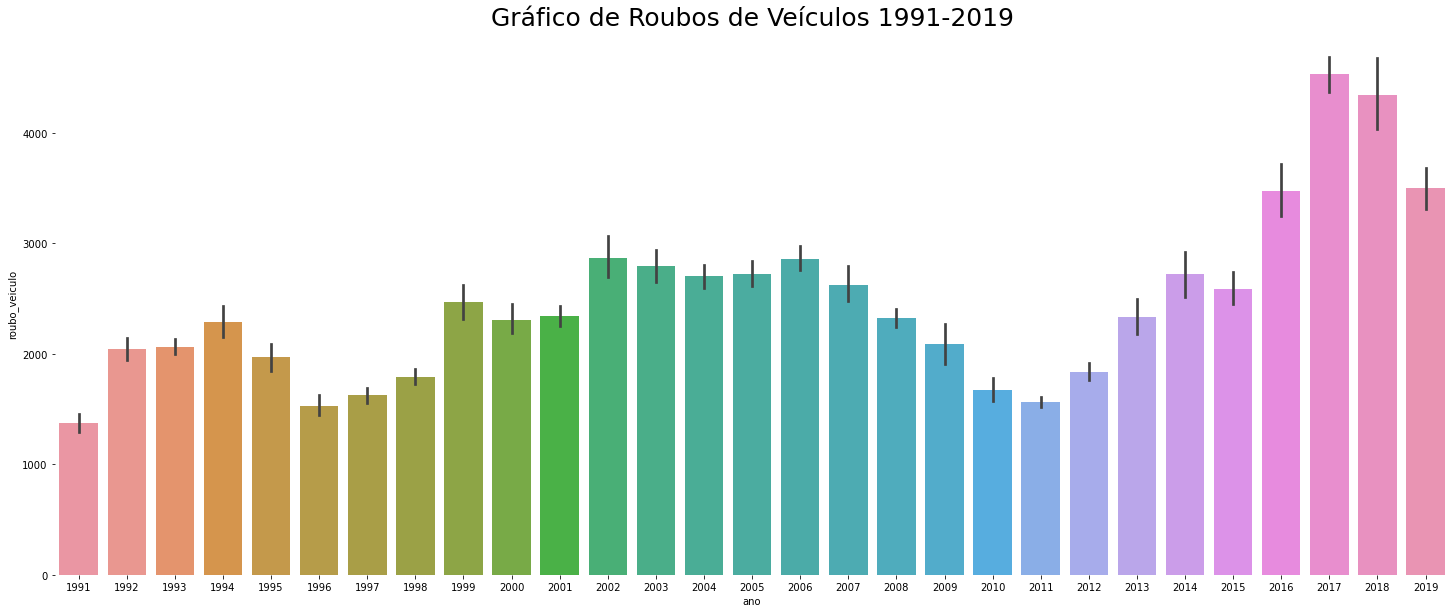

In [34]:
fig, (axis1) = plt.subplots(figsize=(25,10))
grafico = rio_de_janeiro.sort_values(by='data')
sns.barplot(x='ano', y='roubo_veiculo', data=grafico, ax=axis1)
plt.title('Gráfico de Roubos de Veículos 1991-2019', fontsize=25)
plt.box(False)
plt.show()

Observamos que os números de veículos roubados variou ao decorrer dos anos. Tendo, uma forte queda em 2011 e disparou tendo o seu apice em 2017

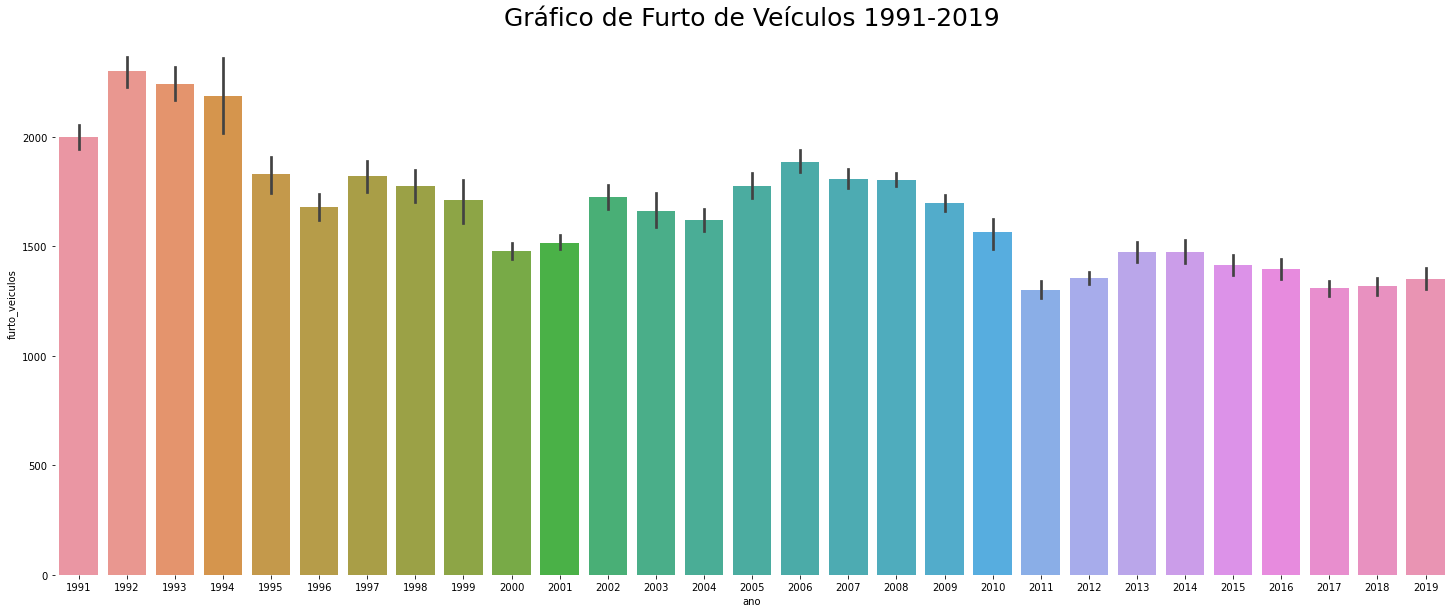

In [33]:
fig, (axis1) = plt.subplots(figsize=(25,10))
grafico = rio_de_janeiro.sort_values(by='data')
sns.barplot(x='ano', y='furto_veiculos', data=grafico, ax=axis1)
plt.title('Gráfico de Furto de Veículos 1991-2019', fontsize=25)
plt.box(False)
plt.show()

No entanto, o número de furtos conservou-se estável e tendo uma pequena queda no periodo analisado.

## Conclusão

Torna-se evidente, portanto, que neste projeto foram realizadas inúmeras tarefas, podendo ser listadas como:

* Analisar os dados
* Limpeza e tratamento dos dados
* Análise dos crimes envolvendo roubo e furto de veículos
* Criação de gráficos para melhor entendimento

À vista disso, finalizamos que:

* O número de roubos de veículos aumentaram bruscamente.
* O número de furtos de veículos manteve-se considerável estável ao decorrer dos anos.